In [185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight/Jan_2019_ontime.csv


In [186]:
#LOAD AND PREVIEW DATA
filename = '/kaggle/input/flight/Jan_2019_ontime.csv'

df = pd.read_csv(filename)
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [187]:
# drop kolom yang tidak digunakan
dataframe = df.drop(columns=['TAIL_NUM', 'OP_UNIQUE_CARRIER'])

dataframe.head(4)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,20363,9E,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,20363,9E,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,20363,9E,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,20363,9E,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223


In [188]:
# menentukan feature vector dan target variabel
X = dataframe.drop(['CANCELLED'], axis=1)

y = dataframe['CANCELLED']

In [189]:
# split X dan y ke train set dan test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [190]:
X_train.shape, X_test.shape

((467188, 16), (116797, 16))

In [191]:
# menampilkan variabel categorical

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']

In [192]:
# cek missing values pada variabel categorical di training set

X_train[categorical].isnull().mean()

OP_CARRIER      0.0
ORIGIN          0.0
DEST            0.0
DEP_TIME_BLK    0.0
dtype: float64

In [193]:
# cek missing values pada variabel categorical di test set

X_test[categorical].isnull().sum()

OP_CARRIER      0
ORIGIN          0
DEST            0
DEP_TIME_BLK    0
dtype: int64

In [194]:
# menampilkan variabel categorical

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'DEST_AIRPORT_ID',
 'DEP_TIME',
 'DEP_DEL15',
 'ARR_TIME',
 'ARR_DEL15',
 'DIVERTED',
 'DISTANCE']

In [195]:
# cek missing values pada variabel numerical di training set

X_train[numerical].isnull().mean()

DAY_OF_MONTH             0.000000
DAY_OF_WEEK              0.000000
OP_CARRIER_AIRLINE_ID    0.000000
OP_CARRIER_FL_NUM        0.000000
ORIGIN_AIRPORT_ID        0.000000
DEST_AIRPORT_ID          0.000000
DEP_TIME                 0.028047
DEP_DEL15                0.028051
ARR_TIME                 0.029205
ARR_DEL15                0.030838
DIVERTED                 0.000000
DISTANCE                 0.000000
dtype: float64

In [196]:
# menampilkan variabel numerical yang terdapat missing data

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

DEP_TIME 0.028046525167598483
DEP_DEL15 0.028050806099471734
ARR_TIME 0.029204517239312652
ARR_DEL15 0.030837692748957594


In [197]:
# Memperhitungkan variabel numerik yang hilang dengan nilai yang paling sering muncul

for df2 in [X_train, X_test]:
    df2['DEP_TIME'].fillna(X_train['DEP_TIME'].mode()[0], inplace=True)
    df2['DEP_DEL15'].fillna(X_train['DEP_DEL15'].mode()[0], inplace=True)
    df2['ARR_TIME'].fillna(X_train['ARR_TIME'].mode()[0], inplace=True)
    df2['ARR_DEL15'].fillna(X_train['ARR_DEL15'].mode()[0], inplace=True)

In [198]:
# cek missing values pada variabel numerical di training set

X_train[numerical].isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
DEST_AIRPORT_ID          0
DEP_TIME                 0
DEP_DEL15                0
ARR_TIME                 0
ARR_DEL15                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [199]:
# cek missing values di X_train
X_train.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [200]:
# cek missing values di X_test

X_test.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [201]:
X_train[categorical].head()

,OP_CARRIER,ORIGIN,DEST,DEP_TIME_BLK
68992,AA,ORD,PHL,0700-0759
256311,OO,ONT,SFO,1900-1959
483968,MQ,JFK,CLE,1500-1559
67415,B6,BUF,BOS,2100-2159
93603,YV,PHX,FAT,1700-1759


In [202]:
# import category encoders

import category_encoders as ce

In [203]:
# encode categorical variabel menggunakan one-hot encoding

encoder = ce.OneHotEncoder(cols=['OP_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME_BLK'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [204]:
X_train.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_1,OP_CARRIER_2,OP_CARRIER_3,OP_CARRIER_4,OP_CARRIER_5,OP_CARRIER_6,OP_CARRIER_7,...,DEP_TIME_BLK_14,DEP_TIME_BLK_15,DEP_TIME_BLK_16,DEP_TIME_BLK_17,DEP_TIME_BLK_18,DEP_TIME_BLK_19,ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE
68992,4,5,19805,1,0,0,0,0,0,0,...,0,0,0,0,0,0,941.0,0.0,0,678
256311,14,1,20304,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2102.0,0.0,0,363
483968,26,6,20398,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1729.0,0.0,0,425
67415,4,5,20409,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2212.0,0.0,0,395
93603,5,6,20378,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1851.0,1.0,0,493


In [205]:
X_train.shape

(467188, 740)

In [206]:
X_test.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_1,OP_CARRIER_2,OP_CARRIER_3,OP_CARRIER_4,OP_CARRIER_5,OP_CARRIER_6,OP_CARRIER_7,...,DEP_TIME_BLK_14,DEP_TIME_BLK_15,DEP_TIME_BLK_16,DEP_TIME_BLK_17,DEP_TIME_BLK_18,DEP_TIME_BLK_19,ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE
183878,10,4,19790,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1406.0,0.0,0,226
446957,24,4,20416,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1840.0,0.0,0,873
356407,19,6,19930,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015.0,0.0,0,2565
52391,3,4,19393,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2135.0,0.0,0,628
380221,21,1,20398,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1610.0,0.0,0,285


In [207]:
cols = X_train.columns

In [208]:
# Feature scalling

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [209]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [210]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [211]:
X_train.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_1,OP_CARRIER_2,OP_CARRIER_3,OP_CARRIER_4,OP_CARRIER_5,OP_CARRIER_6,OP_CARRIER_7,...,DEP_TIME_BLK_14,DEP_TIME_BLK_15,DEP_TIME_BLK_16,DEP_TIME_BLK_17,DEP_TIME_BLK_18,DEP_TIME_BLK_19,ARR_TIME,ARR_DEL15,DIVERTED,DISTANCE
0,-0.7500,0.333333,-0.297578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.709988,0.0,0.0,0.056380
1,-0.1250,-1.000000,0.565744,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.687124,0.0,0.0,-0.410979
2,0.6250,0.666667,0.728374,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.238267,0.0,0.0,-0.318991
3,-0.7500,0.333333,0.747405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.819495,0.0,0.0,-0.363501
4,-0.6875,0.666667,0.693772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.385078,1.0,0.0,-0.218101


In [212]:
import warnings

warnings.filterwarnings('ignore')

In [213]:
# Model training

# train pengklasifikasi Gaussian Naive Bayes pada training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [214]:
# Memprediksi hasil

y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [215]:
# Cek nilai akurasi model

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9985


In [216]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [217]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9986


In [218]:
# menampilkan nilai dari training set dan test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9986
Test set score: 0.9985


In [219]:
# cek distribusi kelas dalam tes set

y_test.value_counts()

0    113462
1      3335
Name: CANCELLED, dtype: int64

In [220]:
# cek nilai akurasi null

null_accuracy = (113462/(113462+3335))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9714


In [221]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[113374     88]
 [    92   3243]]

True Positives(TP) =  113374

True Negatives(TN) =  3243

False Positives(FP) =  88

False Negatives(FN) =  92


<AxesSubplot:>

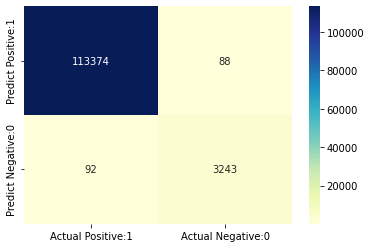

In [222]:
# Visualisasikan confusion matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [223]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113462
           1       0.97      0.97      0.97      3335

    accuracy                           1.00    116797
   macro avg       0.99      0.99      0.99    116797
weighted avg       1.00      1.00      1.00    116797



In [224]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [225]:
# menampilkan akurasi klasifikasi

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9985


In [226]:
# menampilkan classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0015


In [227]:
# menampilkan nilai presisi

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9992
